<a href="https://colab.research.google.com/github/ajohn256/Machine-Learning/blob/main/LogisticRegressionDetailedModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
path_to_file = "./weatherAUS.csv"
raw_data_df = pd.read_csv(path_to_file)

In [3]:
raw_data_df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [4]:
raw_data_df.shape

(145460, 23)

In [5]:
#Drop Missing Values
raw_data_df.dropna(subset = ['RainToday','RainTomorrow'],inplace=True)

In [6]:
# raw_data_df.info()
raw_data_df.shape

(140787, 23)

In [7]:
#WORKING WITH A SAMPLE OF LARGE DATA
sample_fraction = 0.2
raw_data_df = raw_data_df.sample(frac=sample_fraction).copy()
raw_data_df.shape

(28157, 23)

In [8]:
#Splitting Data To Train, Validation And Test sets
# from sklearn.model_selection import train_test_split
# train_validate_df,test_df = train_test_split(raw_data_df,test_size=0.2,random_state = 1)
# train_df,validate_df = train_test_split(train_validate_df,test_size=0.25,random_state=1)

# print("Train Data:",train_df.shape)
# print("Validate Data:",validate_df.shape)
# print("Test Data",test_df.shape)

<Axes: title={'center': 'No. of Rows per Year'}, xlabel='Date', ylabel='count'>

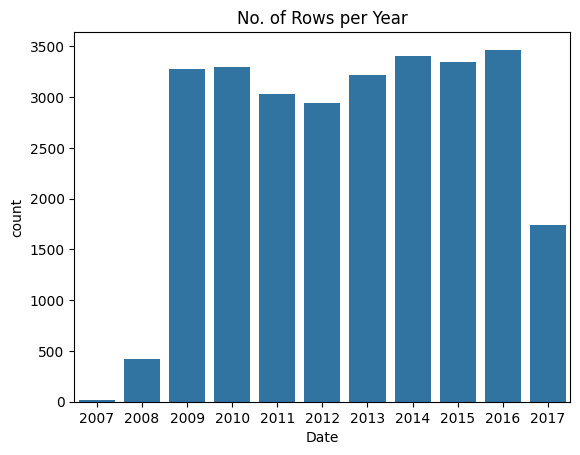

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.title('No. of Rows per Year')
sns.countplot(x=pd.to_datetime(raw_data_df.Date).dt.year)

In [10]:
year = pd.to_datetime(raw_data_df.Date).dt.year
year

,Date
101924,2015
33319,2016
56953,2014
11220,2015
6953,2011
...,...
39986,2010
121879,2011
94340,2011
113068,2013


In [11]:
"""Training Model with data 2007-2014, validate with data of 2015 and test it with future data of 2016 and above"""
train_df = raw_data_df[year < 2015]
validate_df = raw_data_df[year == 2015]
test_df = raw_data_df[year > 2015]

In [12]:
train_df.Date.sort_values(ascending=True)

,Date
45588,2007-11-02
45592,2007-11-06
45593,2007-11-07
45595,2007-11-09
45596,2007-11-10
...,...
60274,2014-12-31
86292,2014-12-31
89332,2014-12-31
122923,2014-12-31


In [13]:
validate_df.Date.sort_values(ascending=True)


,Date
83100,2015-01-01
89333,2015-01-01
141397,2015-01-01
80091,2015-01-01
57235,2015-01-01
...,...
83464,2015-12-31
143339,2015-12-31
92737,2015-12-31
74437,2015-12-31


In [14]:
test_df.Date.sort_values(ascending=True)


,Date
102011,2016-01-01
48481,2016-01-01
83465,2016-01-01
29634,2016-01-01
60640,2016-01-01
...,...
117628,2017-06-25
24127,2017-06-25
114619,2017-06-25
84006,2017-06-25


In [15]:
target_column = "RainTomorrow"
input_columns = raw_data_df.columns[1:-1]
input_columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday'],
      dtype='object')

In [16]:
#Setting up train_input and train_targets etc
train_inputs = train_df[input_columns]
train_targets = train_df[target_column]

validate_inputs = validate_df[input_columns]
validate_targets = validate_df[target_column]

test_inputs = test_df[input_columns]
test_targets = test_df[target_column]

In [17]:
# train_targets = pd.DataFrame(train_targets)
# validate_targets = pd.DataFrame(validate_targets)
# test_targets = pd.DataFrame(test_targets)

In [18]:

print(train_inputs.shape)
print(train_targets.shape)#*
print(test_inputs.shape)
print(test_targets.shape)#*
print(validate_inputs.shape)
print(validate_targets.shape)#*

(19607, 21)
(19607,)
(5208, 21)
(5208,)
(3342, 21)
(3342,)


In [19]:
#Identify Numeric and Categorical Columns
numerical_columns = train_inputs.select_dtypes(include=np.number).columns
categorical_columns = train_inputs.select_dtypes('object').columns


In [20]:
train_inputs[numerical_columns].describe().head(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,19552.000000,19571.000000,19607.000000,12417.000000,11542.000000,18286.000000,19432.000000,19389.000000,19407.000000,19390.000000,17836.000000,17831.000000,12536.000000,12353.000000,19495.000000,19484.000000
mean,12.031460,23.018078,2.435681,5.235886,7.587506,40.299519,14.191951,18.808293,68.715876,51.625890,1017.458253,1015.078373,4.325702,4.441998,16.843493,21.533438
std,6.313281,6.913539,8.561389,3.900586,3.799246,13.793517,9.027414,8.870979,19.088949,20.852567,7.146656,7.058104,2.874328,2.699379,6.371966,6.762284
min,-7.100000,-3.700000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,2.000000,0.000000,980.500000,979.000000,0.000000,0.000000,-5.500000,-4.100000
25%,7.500000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.800000,1010.400000,1.000000,2.000000,12.200000,16.600000
50%,11.800000,22.500000,0.000000,4.400000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.500000,1015.100000,5.000000,5.000000,16.600000,21.000000
75%,16.600000,27.800000,0.800000,7.000000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.200000,1019.900000,7.000000,7.000000,21.300000,26.100000
max,33.900000,47.300000,208.500000,64.800000,14.300000,135.000000,83.000000,87.000000,100.000000,100.000000,1041.000000,1038.200000,8.000000,8.000000,38.300000,45.800000


Imputing Missing Numeric Data

In [21]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")

In [22]:
raw_data_df[numerical_columns].isna().sum()

,0
MinTemp,86
MaxTemp,58
Rainfall,0
Evaporation,11880
Sunshine,13425
WindGustSpeed,1756
WindSpeed9am,210
WindSpeed3pm,505
Humidity9am,297
Humidity3pm,717


In [23]:
imputer.fit(raw_data_df[numerical_columns])
imputer.statistics_

array([  12.17591821,   23.20902167,    2.39863977,    5.42661424,
          7.62813603,   40.05287678,   14.04705335,   18.66725734,
         68.93700646,   51.58316327, 1017.62491647, 1015.23392479,
          4.43248186,    4.52683507,   16.97006815,   21.65751847])

In [24]:
#filling in the imputed averages to the traing sets
train_inputs[numerical_columns] = imputer.transform(train_inputs[numerical_columns])
validate_inputs[numerical_columns] = imputer.transform(validate_inputs[numerical_columns])
test_inputs[numerical_columns] = imputer.transform(test_inputs[numerical_columns])

<ipython-input-24-f96a68d5ca20>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_inputs[numerical_columns] = imputer.transform(train_inputs[numerical_columns])
<ipython-input-24-f96a68d5ca20>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validate_inputs[numerical_columns] = imputer.transform(validate_inputs[numerical_columns])
<ipython-input-24-f96a68d5ca20>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [25]:
# train_inputs[numerical_columns].isna().sum()
# test_inputs[numerical_columns].isna().sum()
validate_inputs[numerical_columns].isna().sum()

,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustSpeed,0
WindSpeed9am,0
WindSpeed3pm,0
Humidity9am,0
Humidity3pm,0


In [26]:
#Scaling Numeric Values to smaller sizes
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(raw_data_df[numerical_columns])

MinMaxScaler()

In [27]:

print(scaler.data_min_)
print(scaler.data_max_)

[ -7.8  -3.7   0.    0.    0.    7.    0.    0.    2.    0.  980.5 979.
   0.    0.   -7.   -4.1]
[  33.9   47.3  208.5   70.4   14.3  135.    87.    87.   100.   100.
 1041.  1038.2    8.     8.    38.3   45.8]


In [28]:
'''We can now separately scale the training, validation and test sets using the `transform` method of `scaler`'''
train_inputs[numerical_columns] = scaler.transform(train_inputs[numerical_columns])
validate_inputs[numerical_columns] = scaler.transform(validate_inputs[numerical_columns])
test_inputs[numerical_columns] = scaler.transform(test_inputs[numerical_columns])

<ipython-input-28-f19002d6d0c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_inputs[numerical_columns] = scaler.transform(train_inputs[numerical_columns])
<ipython-input-28-f19002d6d0c4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validate_inputs[numerical_columns] = scaler.transform(validate_inputs[numerical_columns])
<ipython-input-28-f19002d6d0c4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [29]:
train_inputs[numerical_columns].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,19607.000000,19607.000000,19607.000000,19607.000000,19607.000000,19607.000000,19607.000000,19607.000000,19607.000000,19607.000000,19607.000000,19607.000000,19607.000000,19607.000000,19607.000000,19607.000000
mean,0.475584,0.523891,0.011682,0.075367,0.531764,0.260023,0.163111,0.216169,0.680797,0.516254,0.611129,0.609670,0.545526,0.559173,0.526362,0.513712
std,0.151185,0.135435,0.041062,0.044111,0.203844,0.104069,0.103299,0.101397,0.193789,0.207368,0.112668,0.113699,0.287357,0.267872,0.140259,0.135091
min,0.016787,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033113,0.000000
25%,0.366906,0.425490,0.000000,0.051136,0.524476,0.187500,0.080460,0.149425,0.561224,0.370000,0.542149,0.538851,0.375000,0.375000,0.426049,0.416834
50%,0.470024,0.513725,0.000000,0.077083,0.533436,0.250000,0.149425,0.218391,0.693878,0.520000,0.613635,0.612060,0.554060,0.565854,0.520971,0.503006
75%,0.585132,0.617647,0.003837,0.077083,0.643357,0.304688,0.218391,0.275862,0.826531,0.660000,0.680992,0.680743,0.750000,0.750000,0.622517,0.605210
max,1.000000,1.000000,1.000000,0.920455,1.000000,1.000000,0.954023,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
#Encoding Categorical Data
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
categorical = raw_data_df[categorical_columns]
encoder.fit(categorical)

OneHotEncoder()

In [31]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 ar

In [32]:
#We can generate column names for each individual category using get_feature_names_out .
encoded_columns = list(encoder.get_feature_names_out(categorical_columns))
encoded_columns

['Location_Adelaide',
 'Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_GoldCoast',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_PearceRAAF',
 'Location_Penrith',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',
 'Location_Richmond',
 'Location_Sale',
 'Location_SalmonGums',
 'Location_Sydney',
 'Location_SydneyAirport',
 'Location_Townsville',
 'Location_Tuggeranong',
 'Location_Uluru',
 'Location_WaggaWagga',
 'Location_Walpole',
 'Locat

In [33]:
train_inputs[encoded_columns] = encoder.transform(train_inputs[categorical_columns]).toarray()
validate_inputs[encoded_columns] = encoder.transform(validate_inputs[categorical_columns]).toarray()
test_inputs[encoded_columns] = encoder.transform(test_inputs[categorical_columns]).toarray()

<ipython-input-33-8fe343735a84>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_inputs[encoded_columns] = encoder.transform(train_inputs[categorical_columns]).toarray()
<ipython-input-33-8fe343735a84>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_columns] = encoder.transform(train_inputs[categorical_columns]).toarray()
<ipython-input-33-8fe343735a84>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor per

In [34]:
train_inputs.head(10)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes
56953,Ballarat,0.431655,0.507843,0.000000,0.077083,0.533436,SE,0.320312,SE,SSE,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6953,Cobar,0.294964,0.433333,0.000000,0.025568,0.533436,WNW,0.179688,NNE,W,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
27666,Richmond,0.251799,0.501961,0.000000,0.077083,0.533436,NW,0.304688,NE,WSW,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
106087,Woomera,0.350120,0.362745,0.000000,0.034091,0.076923,SSE,0.117188,S,SSE,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
98211,Adelaide,0.577938,0.684314,0.004796,0.161932,0.909091,WSW,0.164062,NNW,W,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
82781,Dartmoor,0.527578,0.523529,0.004796,0.090909,0.741259,SW,0.234375,SW,SSW,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
133981,Launceston,0.270983,0.325490,0.005755,0.077083,0.533436,SSE,0.281250,NaN,SSE,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6982,Cobar,0.393285,0.456863,0.000000,0.056818,0.533436,E,0.234375,E,SE,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
94144,Townsville,0.458034,0.582353,0.000000,0.076705,0.720280,ENE,0.218750,WNW,ENE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
16431,Newcastle,0.374101,0.484314,0.000000,0.077083,0.533436,NaN,0.258226,NaN,SE,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [35]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', validate_inputs.shape)
print('val_targets:', validate_inputs.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (19607, 123)
train_targets: (19607,)
val_inputs: (3342, 123)
val_targets: (3342, 123)
test_inputs: (5208, 123)
test_targets: (5208,)


In [36]:
train_inputs.to_parquet('train_inputs.parquet')
validate_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')

train_inputs.to_csv('train_inputs.csv')
validate_inputs.to_csv('val_inputs.csv')
test_inputs.to_csv('test_inputs.csv')

In [37]:

pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(validate_targets).to_parquet('val_targets.parquet')
pd.DataFrame(test_targets).to_parquet('test_targets.parquet')

pd.DataFrame(train_targets).to_csv('train_targets.csv')
pd.DataFrame(validate_targets).to_csv('val_targets.csv')
pd.DataFrame(test_targets).to_csv('test_targets.csv')

In [38]:

# train_inputs = pd.read_parquet('train_inputs.parquet')
# val_inputs = pd.read_parquet('val_inputs.parquet')
# test_inputs = pd.read_parquet('test_inputs.parquet')
train_inputs = pd.read_csv('train_inputs.csv')
val_inputs = pd.read_csv('val_inputs.csv')
test_inputs = pd.read_csv('test_inputs.csv')

train_targets = pd.read_csv('train_targets.csv')[target_column]
val_targets = pd.read_csv('val_targets.csv')[target_column]
test_targets = pd.read_csv('test_targets.csv')[target_column]

# train_targets = pd.read_parquet('train_targets.parquet')[target_column]
# val_targets = pd.read_parquet('val_targets.parquet')[target_column]
# test_targets = pd.read_parquet('test_targets.parquet')[target_column]

In [39]:
# print('train_inputs:', train_inputs.shape)
# print('train_targets:', train_targets.shape)
# print('val_inputs:', val_inputs.shape)
# print('val_targets:', val_targets.shape)
# print('test_inputs:', test_inputs.shape)
# print('test_targets:', test_targets.shape)

In [40]:
validate_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes
101924,MountGambier,0.585132,0.478431,0.000000,0.170455,0.321678,W,0.351562,WNW,WSW,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
11220,CoffsHarbour,0.697842,0.574510,0.005755,0.077083,0.533436,SSW,0.320312,SW,SSW,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
80151,Watsonia,0.414868,0.598039,0.000959,0.079545,0.615385,SSW,0.132812,ENE,ESE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
113787,Witchcliffe,0.642686,0.552941,0.012470,0.077083,0.533436,WNW,0.265625,W,WNW,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
60439,Bendigo,0.306954,0.388235,0.000000,0.077083,0.533436,ESE,0.179688,SSE,E,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129214,Walpole,0.443645,0.470588,0.000000,0.077083,0.533436,SE,0.234375,E,ESE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
72702,Mildura,0.187050,0.329412,0.000959,0.028409,0.391608,WSW,0.187500,W,SW,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
141613,Darwin,0.601918,0.680392,0.000000,0.127841,0.783217,SE,0.281250,SE,ESE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5481,BadgerysCreek,0.501199,0.700000,0.000000,0.077083,0.533436,ESE,0.281250,SSE,NE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [41]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')

In [42]:
train_data = train_inputs[numerical_columns.to_list() + encoded_columns]

model.fit(train_data, train_targets)

LogisticRegression(solver='liblinear')

In [43]:
print(model.coef_.tolist())

[[0.7511871699734359, -1.4818830323870646, 1.2003726221401325, 0.41656108871705566, -1.676496503839922, 5.914755224853072, -0.4608272012814158, -0.709302081174729, 0.4945335171704544, 5.696358582537748, 2.2938899315769095, -5.763621866772942, -0.3891290923753491, 1.2129719698151162, 0.2334008540828098, 0.4687173163532826, 0.5648264642450934, -0.39928229806892657, 0.6300748229888393, -0.15611846834007384, 0.5191364372789069, -0.36910858310100264, 0.07967856525355296, 0.5087277635032326, 0.18452023810196877, -0.06764319894850992, 0.0555676098291661, -0.03445772928357585, -0.08545548233511929, -0.4801141885018649, -0.15017111833202487, -0.6915163847649205, -0.6883250558679888, -0.48950357066453265, -0.2730901554906264, -0.5842756454019192, -0.11540833048200125, -0.009191278962992431, 0.06313752053674812, -0.6191130140211859, -0.2791950458841778, -0.13794066832775595, -0.14979140912680614, -0.5805837421184862, -0.11630602105562889, 0.027337242060931428, 0.4483772602621831, 0.66916769636268

In [44]:
print(model.intercept_)

[-2.21361332]


In [45]:
'''Making Predictions and Evaluating the Model
We can now use the trained model to make predictions on the training, test
'''

X_train = train_inputs[numerical_columns.tolist() + encoded_columns]
X_val = val_inputs[numerical_columns.tolist() + encoded_columns]
X_test = test_inputs[numerical_columns.tolist() + encoded_columns]

In [46]:
train_preds = model.predict(X_train)
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [47]:
from sklearn.metrics import accuracy_score
train_set_accuracy = accuracy_score(train_targets, train_preds)
train_set_accuracy

0.8533686948538787

In [48]:
X_val = val_inputs[numerical_columns.tolist() + encoded_columns]

val_preds = model.predict(X_val)
val_preds

array(['No', 'Yes', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [49]:
validate_set_accuracy = accuracy_score(validate_targets,val_preds)
validate_set_accuracy

0.855475763016158

In [50]:
X_test = test_inputs[numerical_columns.tolist() + encoded_columns]
test_preds = model.predict(X_test)
test_preds

array(['No', 'No', 'Yes', ..., 'No', 'No', 'No'], dtype=object)

In [51]:
test_accuracy_score = accuracy_score(test_targets,test_preds)
test_accuracy_score

0.8402457757296466

In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix(train_targets, train_preds, normalize='true')

array([[0.94638264, 0.05361736],
       [0.4639964 , 0.5360036 ]])

In [53]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)

    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name))

    return preds

Accuracy: 85.34%


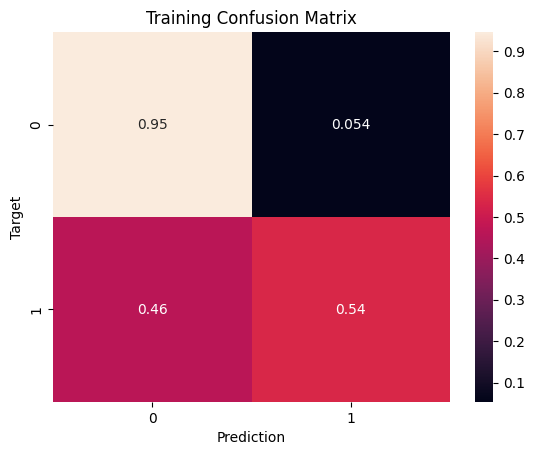

In [54]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')

Accuracy: 85.55%


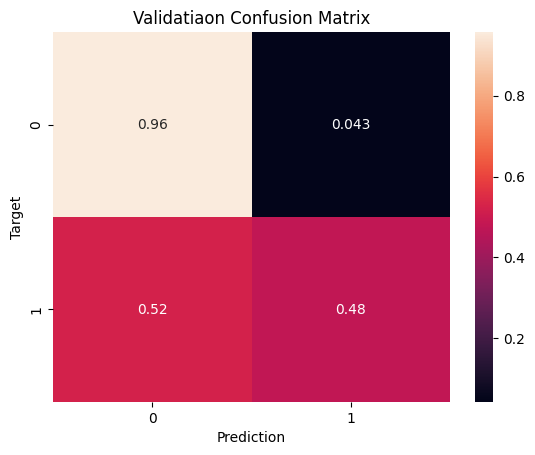

In [55]:
val_preds = predict_and_plot(X_val, val_targets, 'Validatiaon')

Accuracy: 84.02%


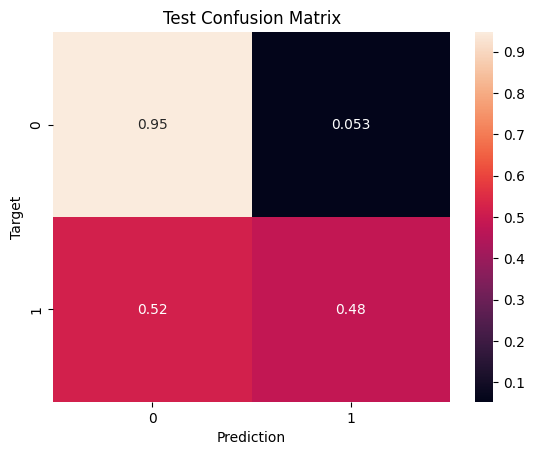

In [56]:
test_preds = predict_and_plot(X_test, test_targets, 'Test')

The accuracy of the model on the test and validation set are above 84%, which suggests that our model generalizes well to data it hasn't seen before.

But how good is 84% accuracy? While this depends on the nature of the problem and on business requirements, a good way to verify whether a model has actually learned something useful is to compare its results to a "random" or "dumb" model.

Let's create two models: one that guesses randomly and another that always return "No". Both of these models completely ignore the inputs given to them.

In [57]:
def random_guess(inputs):
    return np.random.choice(["No", "Yes"], len(inputs))

In [58]:
def all_no(inputs):
    return np.full(len(inputs), "No")

In [59]:
accuracy_score(test_targets, random_guess(X_test))

0.5053763440860215

In [60]:
accuracy_score(test_targets, all_no(X_test))

0.7713133640552995

Making Predictions on a Single Input
Once the model has been trained to a satisfactory accuracy, it can be used to make predictions on new data. Consider the following dictionary containing data collected from the Katherine weather department today.

In [61]:
new_input = {'Date': '2024-06-19',
             'Location': 'Katherine',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 28.7,
             'Temp3pm': 33.0,
             'RainToday': 'No'}

In [62]:
#The first step is to convert the dictionary into a Pandas dataframe, similar to raw_df. This can be done by passing a list containing the given dictionary to the pd.DataFrame constructor.

new_input_df = pd.DataFrame([new_input])

In [63]:
new_input_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2024-06-19,Katherine,23.2,33.2,10.2,4.2,NaN,NNW,52.0,NW,...,20.0,89.0,58.0,1004.8,1001.5,8.0,5.0,28.7,33.0,No


In [64]:
new_input_df[numerical_columns] = imputer.transform(new_input_df[numerical_columns])
new_input_df[numerical_columns] = scaler.transform(new_input_df[numerical_columns])
new_input_df[encoded_columns] = encoder.transform(new_input_df[categorical_columns]).toarray()

<ipython-input-64-308b13f6d9bd>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_input_df[encoded_columns] = encoder.transform(new_input_df[categorical_columns]).toarray()
<ipython-input-64-308b13f6d9bd>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_input_df[encoded_columns] = encoder.transform(new_input_df[categorical_columns]).toarray()
<ipython-input-64-308b13f6d9bd>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  

In [65]:
X_new_input = new_input_df[numerical_columns.tolist() + encoded_columns]
X_new_input

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes
0,0.743405,0.723529,0.048921,0.059659,0.533436,0.351562,0.149425,0.229885,0.887755,0.58,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [66]:
prediction = model.predict(X_new_input)[0]

In [67]:
prediction
# model.classes_

'No'

In [68]:
#Probability of it raining tomorrow
prob = model.predict_proba(X_new_input)[0]
prob

array([0.64725853, 0.35274147])

Looks like our model isn't too confident about its prediction!

Let's define a helper function to make predictions for individual inputs.

In [69]:
def predict_input(single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numerical_columns] = imputer.transform(input_df[numerical_columns])
    input_df[numerical_columns] = scaler.transform(input_df[numerical_columns])
    input_df[encoded_columns] = encoder.transform(input_df[categorical_columns]).toarray()
    X_input = input_df[numerical_columns.tolist() + encoded_columns]
    pred = model.predict(X_input)[0]
    prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
    return pred, prob

In [70]:
new_input = {'Date': '2021-06-19',
             'Location': 'Launceston',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 18.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 98.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 23.7,
             'Temp3pm': 30.0,
             'RainToday': 'Yes'}

In [71]:
predict_input(new_input)

<ipython-input-69-ce542895736b>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[encoded_columns] = encoder.transform(input_df[categorical_columns]).toarray()
<ipython-input-69-ce542895736b>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[encoded_columns] = encoder.transform(input_df[categorical_columns]).toarray()
<ipython-input-69-ce542895736b>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining

('Yes', 0.520925404380214)